# Notebook seasonality prediction

In [44]:
import main as tools

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
sns.set_style("darkgrid")

# Load everythign into a dictionary
data_dict = tools.load_data_dict()

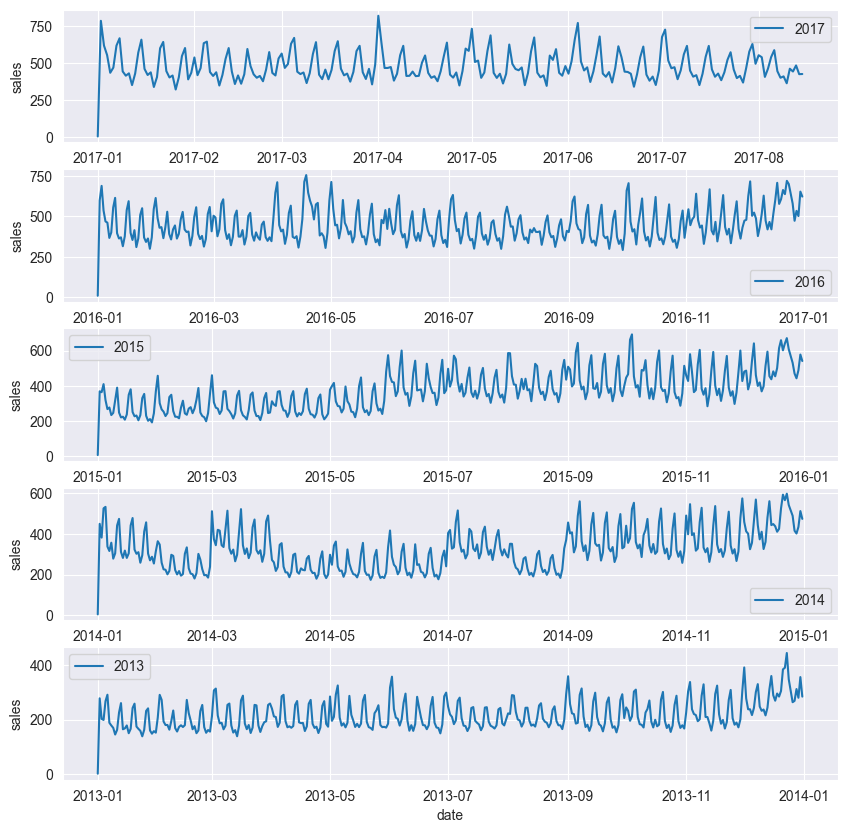

In [3]:
# plotting original data
avg = data_dict['avg'].copy()
x= avg['sales'].copy()


fig, ax = plt.subplots(5,1, figsize=(10,10))
## lets look at each year
for year in range(2013, 2018):
    year_data = data_dict['avg'][data_dict['avg'].index.year== year]
    x = year_data['sales'].copy()
    sns.lineplot(x, label=year, ax=ax[2017-year])

## We see alot of periodicity (is this a word?) in the data

Above is too dense, lets just do one year by year for now

[Text(0.5, 0, 'data'), Text(0, 0.5, 'day before')]

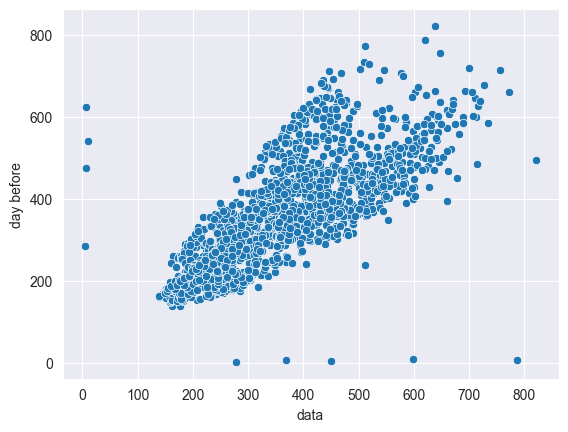

In [16]:
# what if we plot with the day respect to the day before?
data = data_dict['avg']
delayed = data.shift(1)

ax = sns.scatterplot(x=data['sales'], y=delayed['sales'] )
ax.set(xlabel='data', ylabel='day before')

## disregarding the outlier seems like there is some correlation

                   id  time
date                       
2013-01-01      890.5     0
2013-01-02     2672.5     1
2013-01-03     4454.5     2
2013-01-04     6236.5     3
2013-01-05     8018.5     4
...               ...   ...
2017-08-11  2992868.5  1679
2017-08-12  2994650.5  1680
2017-08-13  2996432.5  1681
2017-08-14  2998214.5  1682
2017-08-15  2999996.5  1683

[1684 rows x 2 columns]


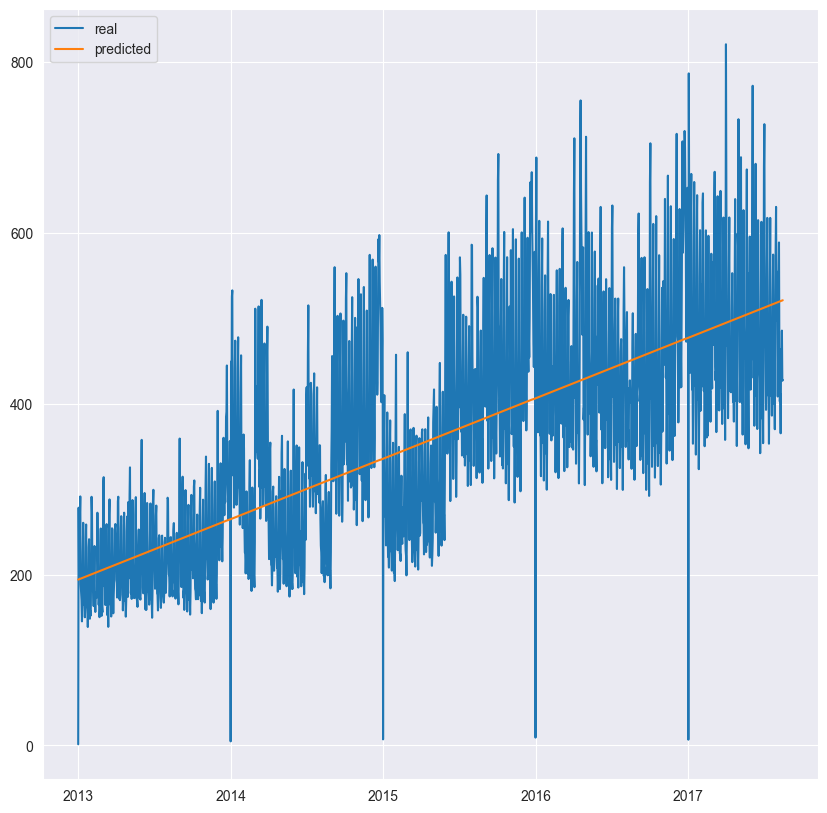

In [18]:
## fitting a linear regression
x = data.copy()

time_dummy = np.arange(len(x.index))
x['time'] = time_dummy


x = x.drop(['sales','onpromotion'], axis=1)
try:
    x = x.drop(['sales','onpromotion'], axis=1)
except:
    pass

y = data['sales'].copy()

model = LinearRegression()

model.fit(x,y)

y_pred = pd.Series(model.predict(x), index=x.index)

## plotting the results
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(y, label='real')
ax.plot(y_pred, label='predicted')
ax.legend()

Pretty terrible response, the model only fits with the timedummy (No surprieses here)  

                   id  time     delayed    delayed1    delayed2    delayed3  \
date                                                                          
2013-01-01      890.5     0    0.000000    0.000000    0.000000    0.000000   
2013-01-02     2672.5     1    1.409438    1.409438    0.000000    0.000000   
2013-01-03     4454.5     2  278.390807  278.390807    1.409438    0.000000   
2013-01-04     6236.5     3  202.840197  202.840197  278.390807    1.409438   
2013-01-05     8018.5     4  198.911154  198.911154  202.840197  278.390807   
...               ...   ...         ...         ...         ...         ...   
2017-08-11  2992868.5  1679  365.536988  365.536988  411.975126  402.786952   
2017-08-12  2994650.5  1680  463.733851  463.733851  365.536988  411.975126   
2017-08-13  2996432.5  1681  444.798280  444.798280  463.733851  365.536988   
2017-08-14  2998214.5  1682  485.768618  485.768618  444.798280  463.733851   
2017-08-15  2999996.5  1683  427.004717  427.004717 

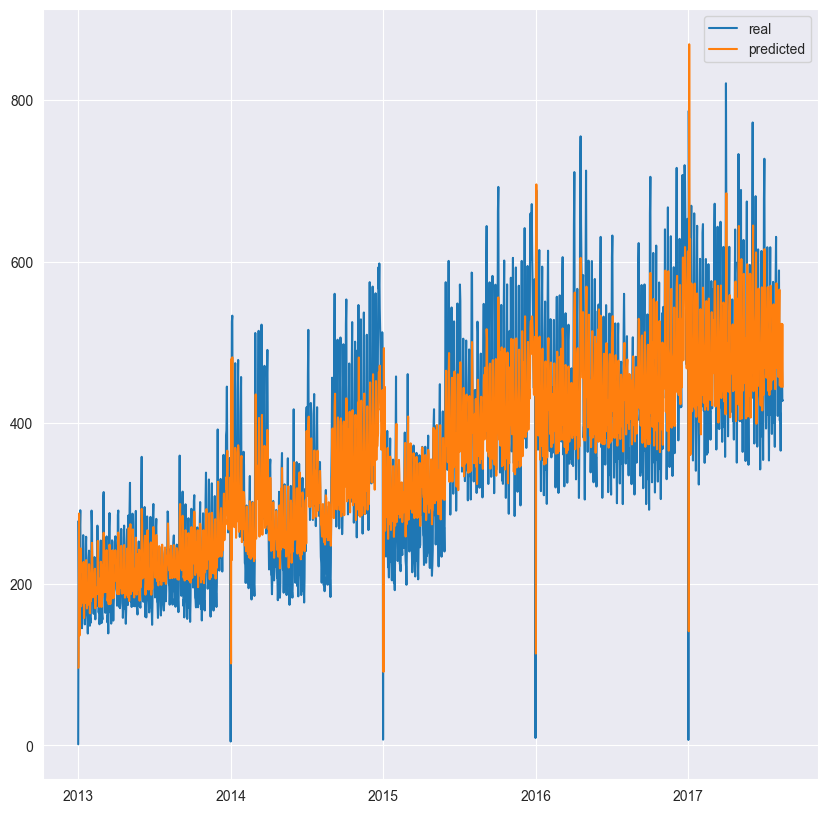

In [52]:
## what if we add the delay?
x = data.copy()
delayed = data.shift(1)
## make na to 0
delayed = delayed.fillna(0)
x['delayed'] = delayed['sales'] ## this will be the avg sales the day before

try:
    x = x.drop(['sales','onpromotion'], axis=1)
except:
    pass



y = data['sales'].copy()

model = LinearRegression()
model.fit(x,y)
y_pred = pd.Series(model.predict(x), index=x.index)


## plotting the results
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(y, label='real')
ax.plot(y_pred, label='predicted')
ax.legend()
acc = metrics.r2_score(y, y_pred)
print(acc)

Seems alot better, lets print for only 2017, to see how much better it actually performs

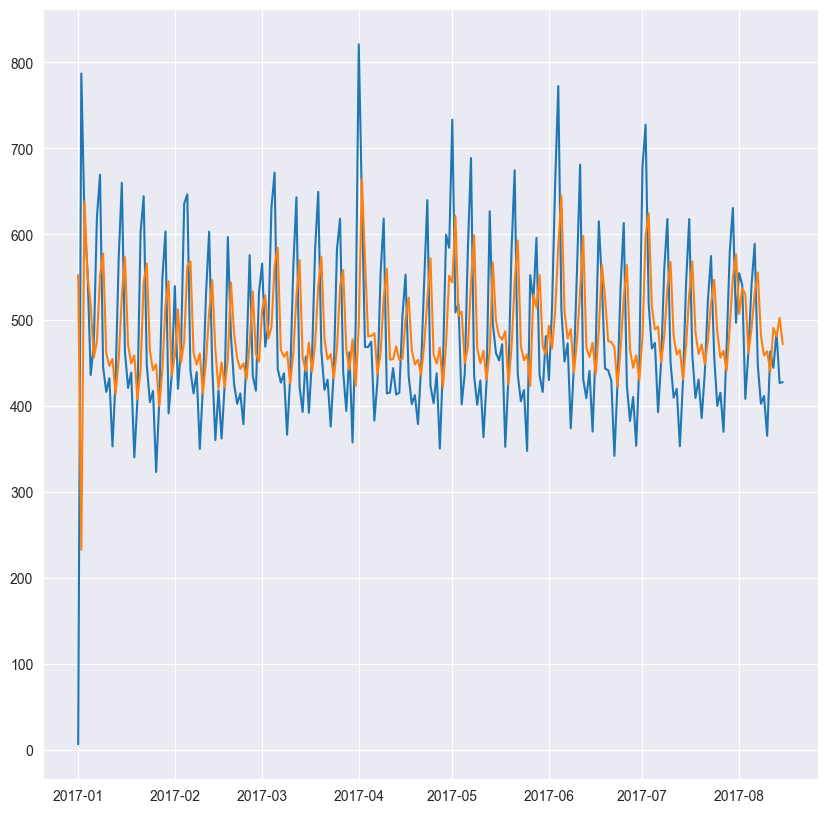

In [33]:
## plotting the data for 2017
fig, ax = plt.subplots(1,1, figsize=(10,10))
y17 = y[y.index.year==2017]
ax.plot(y17, label='real')
ax.plot(y_pred[y_pred.index.year==2017], label='predicted')

                   id       sales  onpromotion  time     delayed    delayed1  \
date                                                                           
2013-01-01      890.5    1.409438     0.000000     0    0.000000    0.000000   
2013-01-02     2672.5  278.390807     0.000000     1    1.409438    1.409438   
2013-01-03     4454.5  202.840197     0.000000     2  278.390807  278.390807   
2013-01-04     6236.5  198.911154     0.000000     3  202.840197  202.840197   
2013-01-05     8018.5  267.873244     0.000000     4  198.911154  198.911154   
...               ...         ...          ...   ...         ...         ...   
2017-08-11  2992868.5  463.733851     7.956790  1679  365.536988  365.536988   
2017-08-12  2994650.5  444.798280     4.664422  1680  463.733851  463.733851   
2017-08-13  2996432.5  485.768618     5.209315  1681  444.798280  444.798280   
2017-08-14  2998214.5  427.004717     4.513468  1682  485.768618  485.768618   
2017-08-15  2999996.5  427.980884     5.

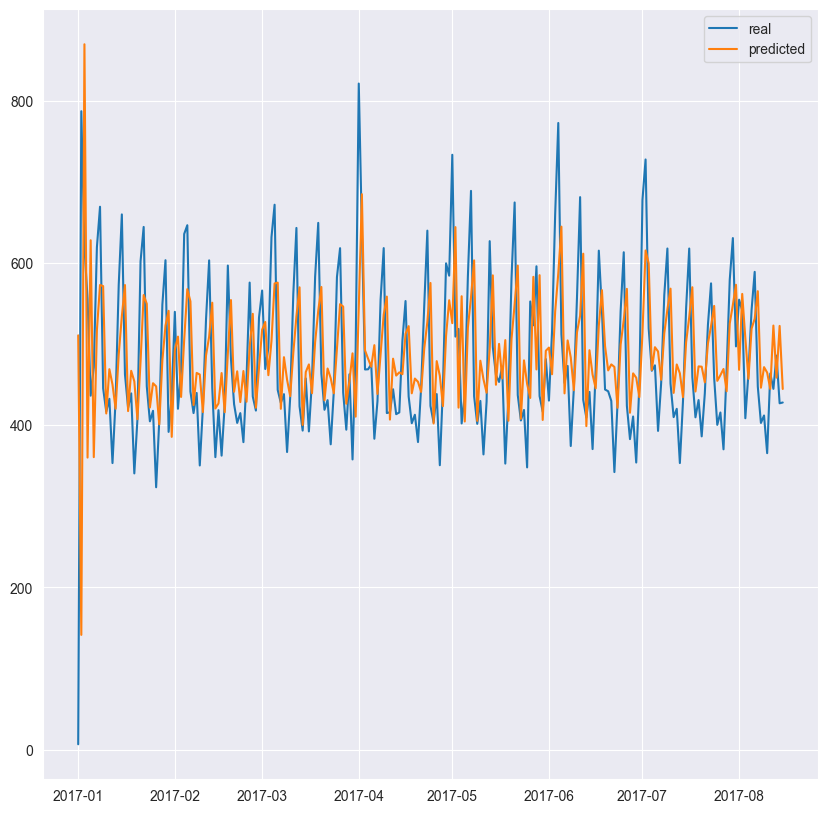

In [53]:
## lets do the same but lets also add more delay (5 days)
x = data
for i in range(1,6):
    delayed = data.shift(i)
    delayed = delayed.fillna(0)
    x['delayed'+str(i)] = delayed['sales']

try:
    x = x.drop(['sales','onpromotion'], axis=1)
except:
    pass


model = LinearRegression()
model.fit(x,y)
y_pred = pd.Series(model.predict(x), index=x.index)

## plotting the results
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(y17, label='real')
ax.plot(y_pred[y_pred.index.year==2017], label='predicted')
ax.legend()

## get the accuracy
acc = metrics.r2_score(y, y_pred)
print(acc)

In [ ]:
#